# Database: Cirrhosis Patient Survival Prediction

Source: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

Description: Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).


### Dataset information

*For what purpose was the dataset created?*

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

*Who funded the creation of the dataset?*

Mayo Clinic

*What do the instances in this dataset represent?*

People

*Does the dataset contain data that might be considered sensitive in any way?*

Gender, Age

*Was there any data preprocessing performed?*

1. Drop all the rows where miss value (NA) were present in the Drug column
2. Impute missing values with mean results
3. One-hot encoding for all category attributes

*Additional Information*

During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomized placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial.

*Has Missing Values?*

Yes (symbol: NA)




### Additional Variable Information
1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

*Class Labels*

Status: status of the patient 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)

## Importing and analyse dataset

In [213]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import os -- did not use


In [136]:
# Importing CSV
db = pd.read_csv('cirrhosis.csv')

In [137]:
# Dataset dimension
db.shape

(418, 20)

In [138]:
# Dataset information (variables, data types, count of non-nulls)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [139]:
# View first 15 rows
db.head(15)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [140]:
# Count unique rows
db.value_counts()



ID   N_Days  Status  Drug             Age    Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT    Tryglicerides  Platelets  Prothrombin  Stage
1    400     D       D-penicillamine  21464  F    Y        Y             Y        Y      14.5       261.0        2.60     156.0   1718.0    137.95  172.0          190.0      12.2         4.0      1
213  2178    C       D-penicillamine  18337  F    N        N             Y        N      0.5        400.0        3.40     9.0     1134.0    96.10   55.0           356.0      10.2         3.0      1
221  2050    C       Placebo          20684  F    N        Y             N        N      0.9        360.0        3.65     72.0    3186.0    94.55   154.0          269.0      9.7          4.0      1
220  1235    D       D-penicillamine  23241  F    N        N             Y        N      3.8        426.0        3.22     96.0    2716.0    210.80  113.0          228.0      10.6         2.0      1
219  2157    C 

In [141]:
# Count duplicate rows
db.duplicated().sum()

# db[db.duplicated()] --> Show duplicate rows (excluding the first occurrence)

# db = db.drop_duplicates() --> # Drop duplicate rows from the DataFrame

0

In [142]:
# Count rows without missings
db.dropna().shape[0]

276

In [143]:
# Count occurrences of complete (non-missing) unique rows
db.value_counts()

ID   N_Days  Status  Drug             Age    Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT    Tryglicerides  Platelets  Prothrombin  Stage
1    400     D       D-penicillamine  21464  F    Y        Y             Y        Y      14.5       261.0        2.60     156.0   1718.0    137.95  172.0          190.0      12.2         4.0      1
213  2178    C       D-penicillamine  18337  F    N        N             Y        N      0.5        400.0        3.40     9.0     1134.0    96.10   55.0           356.0      10.2         3.0      1
221  2050    C       Placebo          20684  F    N        Y             N        N      0.9        360.0        3.65     72.0    3186.0    94.55   154.0          269.0      9.7          4.0      1
220  1235    D       D-penicillamine  23241  F    N        N             Y        N      3.8        426.0        3.22     96.0    2716.0    210.80  113.0          228.0      10.6         2.0      1
219  2157    C 

In [144]:
# Count missings for each variable (both isna() and isnull() work the same)
db.isna().sum()
db.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [145]:
# Relative frequency of missing values in each variable
db.isnull().sum()/len(db)

# Percentage of missing values in each variable
(db.isnull().sum() / len(db) * 100).round(1)

ID                0.0
N_Days            0.0
Status            0.0
Drug             25.4
Age               0.0
Sex               0.0
Ascites          25.4
Hepatomegaly     25.4
Spiders          25.4
Edema             0.0
Bilirubin         0.0
Cholesterol      32.1
Albumin           0.0
Copper           25.8
Alk_Phos         25.4
SGOT             25.4
Tryglicerides    32.5
Platelets         2.6
Prothrombin       0.5
Stage             1.4
dtype: float64

### Analysing specific variables

In [146]:
# Survival Status frequencies
# 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)
db['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [147]:
# Survival Status relative frequencies
db['Status'].value_counts(normalize=True)

Status
C     0.555024
D     0.385167
CL    0.059809
Name: proportion, dtype: float64

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_80942/2553106446.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Death', 'Censored', 'Censored due to\nliver transplantation'])


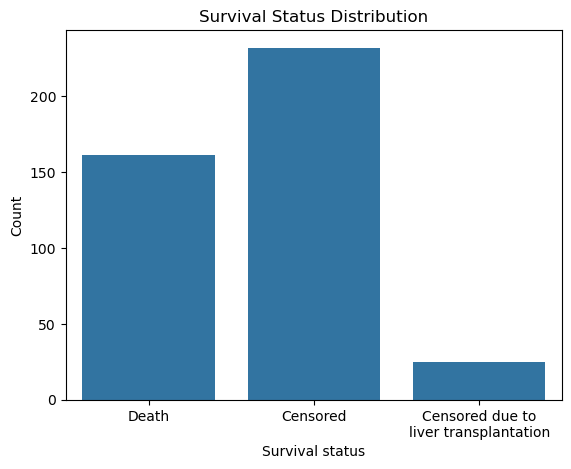

In [148]:
# Countplot for Survival Status distribution
ax = sns.countplot(x='Status', data=db)

plt.title("Survival Status Distribution")
plt.xlabel('Survival status')
plt.ylabel('Count')
ax.set_xticklabels(['Death', 'Censored', 'Censored due to\nliver transplantation'])
plt.show()


In [149]:
# Count without droping missing values
db['Drug'].value_counts(dropna=False)

Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: count, dtype: int64

# Remove rows with missing values in the 'Drug' variable

In [150]:
# Count missing values in Drug column
db['Drug'].isna().sum()

106

In [151]:
# Remove rows with missing values in the 'Drug' column
db = db[db['Drug'].notna()]

db = db.dropna(subset=['Drug'])

## Encoding

In [176]:
# Encoding Survival Status: D = 0 (Death), C = 1 (Censored), CL = 2 (Censored due to liver transplantation)
db['Status']=db['Status'].replace({'D':0, 'C':1, 'CL':2}).astype('int')
db['Status'].value_counts(dropna=False).sort_index()

Status
0    125
1    168
2     19
Name: count, dtype: int64

In [175]:
# Encoding Drug: Placebo = 0, D-penicillamine = 1
db['Drug']=db['Drug'].replace({'Placebo':0, 'D-penicillamine':1,}).astype('int')

db['Drug'].value_counts(dropna=False).sort_index()

Drug
0    154
1    158
Name: count, dtype: int64

In [174]:
# Encoding Sex as binary: M = 0 (Male), F = 1 (Female)
db['Sex']=db['Sex'].replace({'M':0, 'F':1}).astype('int')
db['Sex'].value_counts(dropna=False).sort_index()

Sex
0     36
1    276
Name: count, dtype: int64

In [162]:
# Encode selected Y/N variables to binary: N = 0, Y = 1
cols_yn = ['Ascites', 'Hepatomegaly', 'Spiders'] 

db[cols_yn]=db[cols_yn].replace({'N':0, 'Y':1})
db[cols_yn] = db[cols_yn].astype(int)  # Safe cast since no missing values

db[cols_yn].apply(pd.Series.value_counts)

,Ascites,Hepatomegaly,Spiders
0,288,152,222
1,24,160,90


In [173]:
# Encode Edema: 
# N = 0 → No edema and no diuretic therapy for edema
# S = 1 → Edema present without diuretics, or resolved by diuretics
# Y = 2 → Edema despite diuretic therapy
db['Edema'] = db['Edema'].replace({'N': 0, 'S': 1, 'Y': 2}).astype('int')
db['Edema'].value_counts(dropna=False)


Edema
0    263
1     29
2     20
Name: count, dtype: int64

In [198]:
# Check for missing values in Stage
print(db['Stage'].isna().sum())

# Change Stage datatype 
db['Stage'] = db['Stage'].astype('int')

0


In [197]:
# Check database info

db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

## Mssing data imputation

In [158]:
# Identify variables with missing values
missing_df = pd.DataFrame(db.isnull().mean(), columns=["Missing (%)"])
missing_df = missing_df.reset_index().rename(columns={"index": "Variable"})
missing_df = missing_df[missing_df["Missing (%)"] > 0]
missing_df

,Variable,Missing (%)
11,Cholesterol,0.089744
13,Copper,0.006410
16,Tryglicerides,0.096154
17,Platelets,0.012821


In [165]:
# Impute missing values using mean for continuous variables, and mode for categorical ones

# Loop through variables with missing values
for var in missing_df["Variable"]:
    db[var] = db[var].fillna(db[var].mean())

In [ ]:
# Count missing values for each variable
db.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [169]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int8   
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int8   
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int8   
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

In [168]:
# Count unique values in each variable
db.nunique() 

ID               312
N_Days           301
Status             3
Drug               2
Age              308
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         85
Cholesterol      202
Albumin          135
Copper           159
Alk_Phos         295
SGOT             179
Tryglicerides    147
Platelets        211
Prothrombin       44
Stage              4
dtype: int64

In [179]:
# Remove variables (columns) where more than 99% of the values are identical
# The higher the variance, the more dispersed the data is

variance = db.var()
variance

ID               8.138000e+03
N_Days           1.261760e+06
Status           3.472257e-01
Drug             2.507626e-01
Age              1.493672e+07
Sex              1.023992e-01
Ascites          7.123423e-02
Hepatomegaly     2.506390e-01
Spiders          2.059115e-01
Edema            3.014160e-01
Bilirubin        2.052376e+01
Cholesterol      4.895470e+04
Albumin          1.763093e-01
Copper           7.282607e+03
Alk_Phos         4.581264e+06
SGOT             3.214836e+03
Tryglicerides    3.834923e+03
Platelets        9.023462e+03
Prothrombin      1.008665e+00
Stage            7.706736e-01
dtype: float64

## Drop variables with more than 99% identical values (very low variance)

In [193]:
# Get a list of variables with more than 99% identical values (very low variance)
# Using .items() to iterate over column names and variances
low_variance_vars = [col for col, var in variance.items() if var <= 0.01]

low_variance_vars


[]

In [ ]:
# Drop low-variance variables from the dataset
db = db.drop(columns=low_variance_vars)

In [195]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

## Outliers

In [ ]:
# Identify numerical (float) variables to check for outliers
var_num = [f for f in db.columns if db.dtypes[f] == 'float']
var_num

['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...
307,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4
308,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8
309,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2
310,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5


In [203]:
# Confirm numerical variables
db[var_num]

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...
307,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4
308,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8
309,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2
310,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5


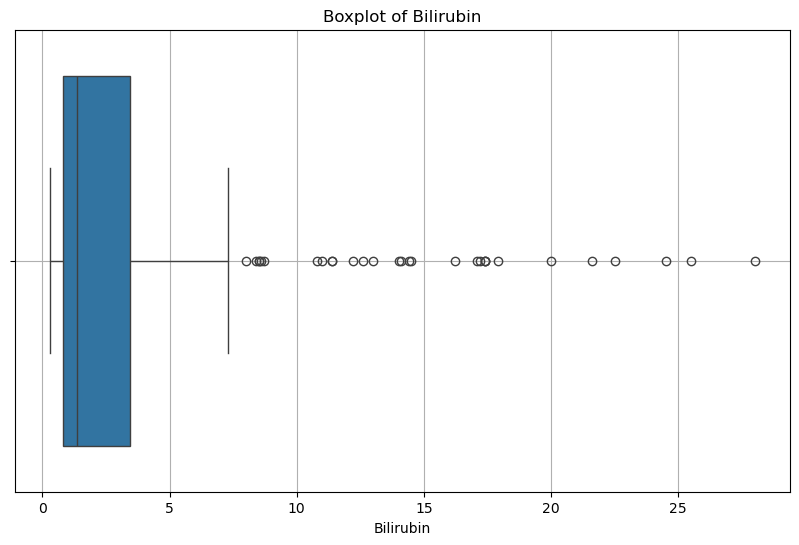

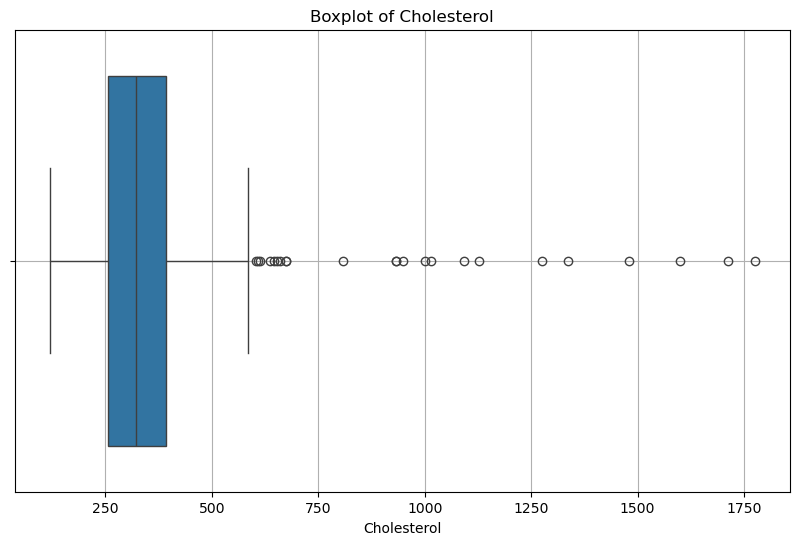

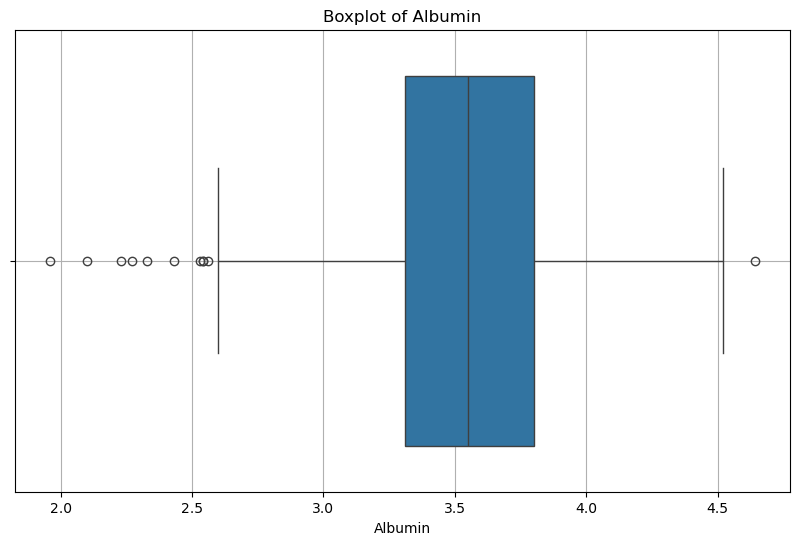

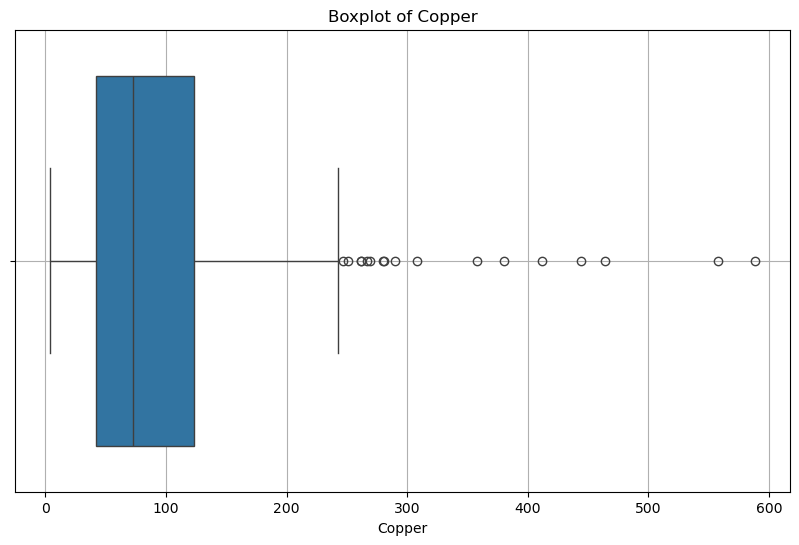

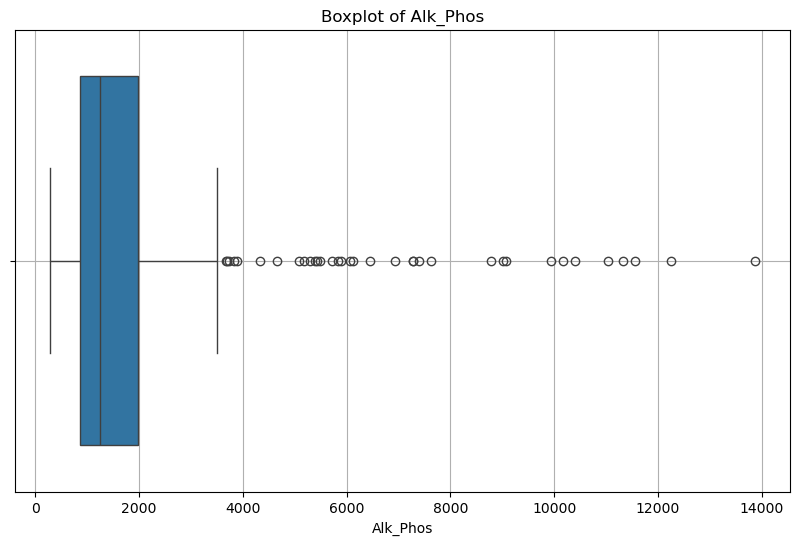

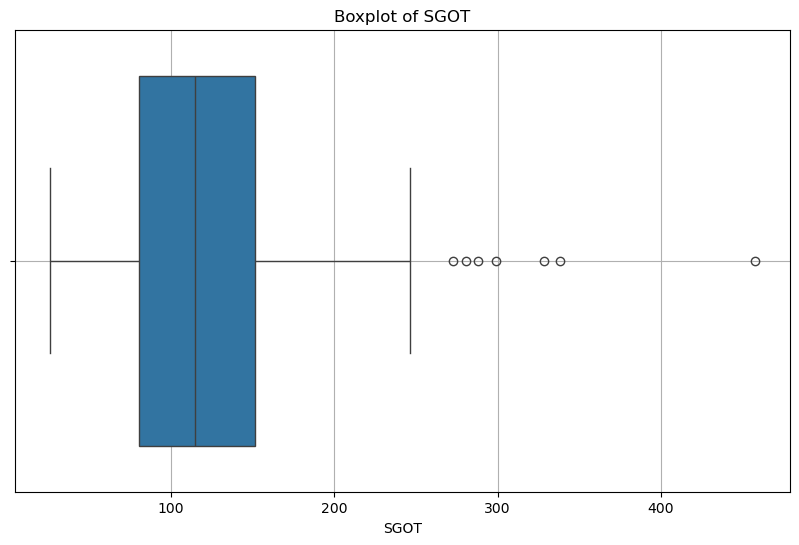

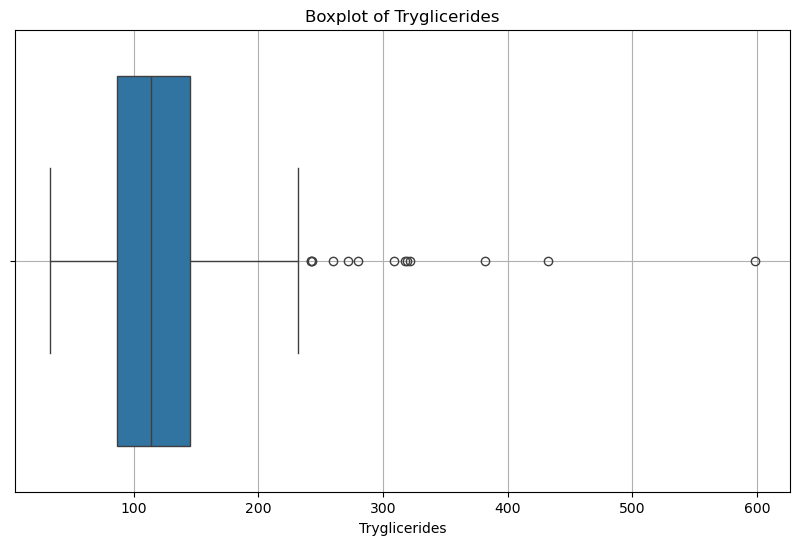

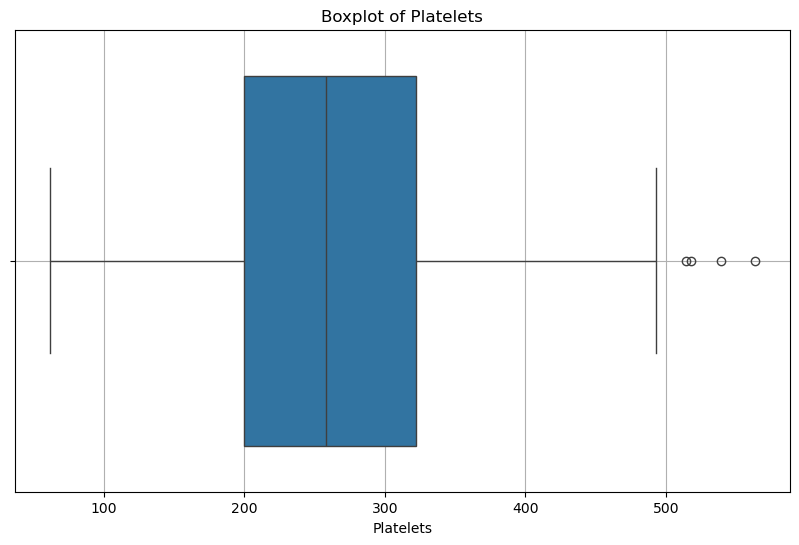

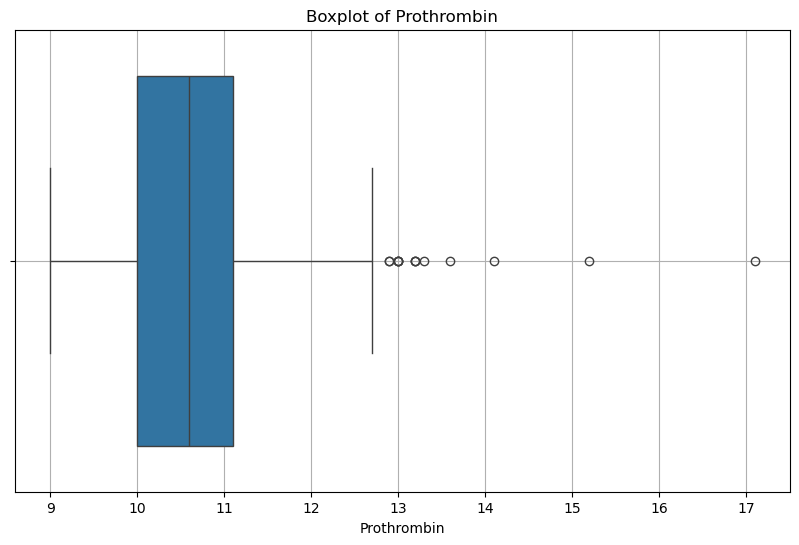

In [ ]:
# Plot boxplots for each numerical variable to check for outliers (excluding NaN)
for col in db[var_num].columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=db[col].dropna())  # Drop NaN values before plotting
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

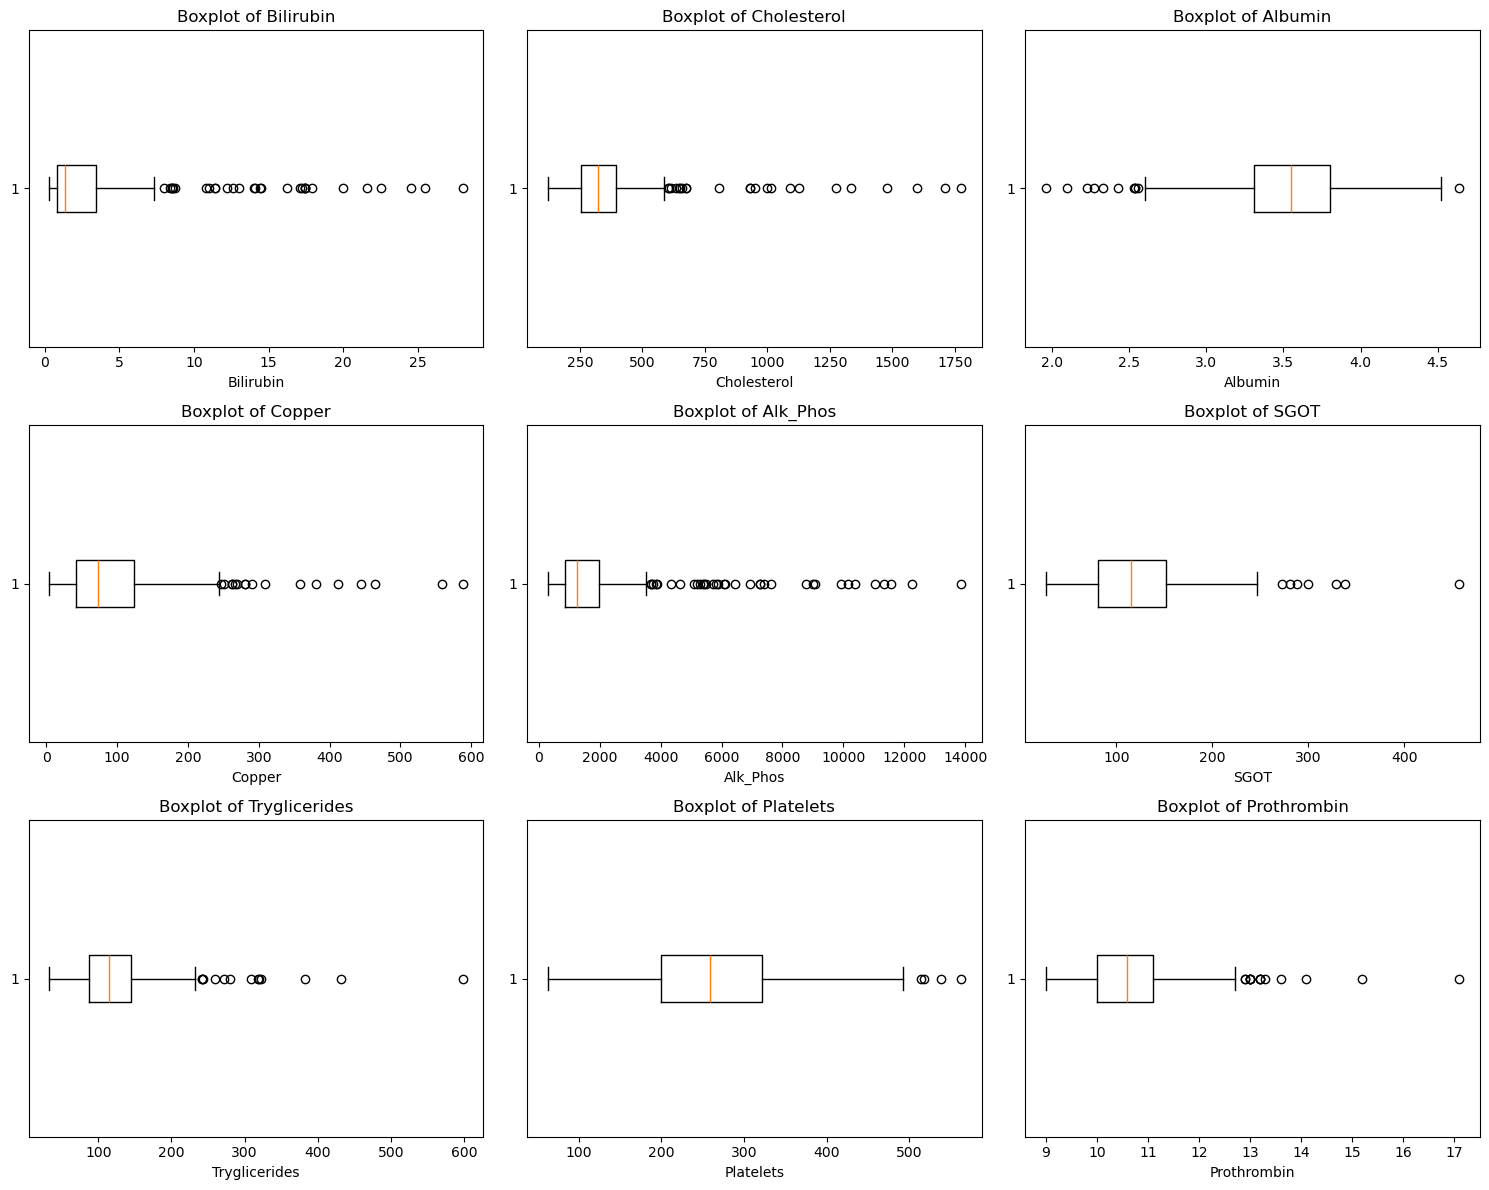

In [ ]:
# Plot boxplots for each numerical variable to check for outliers (excluding NaN)
# Grid alternative

# Set number of columns per row
cols = 3  
rows = (len(var_num) + cols - 1) // cols  # Round up the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(var_num):
    axes[i].boxplot(db[col].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Descriptive statistics of numerical variables
db[var_num].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641
std,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.991905,1.004323
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000
50%,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000
75%,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


In [214]:
# Calculate the IQR and identify outliers for each numerical variable
for col in db[var_num]:
    q1 = np.percentile(db[col].dropna(), 25)
    q3 = np.percentile(db[col].dropna(), 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    print(f"--- {col} ---")
    print(f"Q1: {q1:.2f}, Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print(f"Outliers below lower limit: {(db[col] < lower_limit).sum()}")
    print(f"Outliers above upper limit: {(db[col] > upper_limit).sum()}\n")

--- Bilirubin ---
Q1: 0.80, Q3: 3.42
IQR: 2.62
Lower limit: -3.14
Upper limit: 7.36
Outliers below lower limit: 0
Outliers above upper limit: 30

--- Cholesterol ---
Q1: 255.75, Q3: 392.25
IQR: 136.50
Lower limit: 51.00
Upper limit: 597.00
Outliers below lower limit: 0
Outliers above upper limit: 23

--- Albumin ---
Q1: 3.31, Q3: 3.80
IQR: 0.49
Lower limit: 2.58
Upper limit: 4.53
Outliers below lower limit: 10
Outliers above upper limit: 1

--- Copper ---
Q1: 41.75, Q3: 123.00
IQR: 81.25
Lower limit: -80.12
Upper limit: 244.88
Outliers below lower limit: 0
Outliers above upper limit: 17

--- Alk_Phos ---
Q1: 871.50, Q3: 1980.00
IQR: 1108.50
Lower limit: -791.25
Upper limit: 3642.75
Outliers below lower limit: 0
Outliers above upper limit: 35

--- SGOT ---
Q1: 80.60, Q3: 151.90
IQR: 71.30
Lower limit: -26.35
Upper limit: 258.85
Outliers below lower limit: 0
Outliers above upper limit: 7

--- Tryglicerides ---
Q1: 87.00, Q3: 145.25
IQR: 58.25
Lower limit: -0.38
Upper limit: 232.62
Outlie